<center>
    <h1>Simple Multi-Layer Peceptron for Binary Classification</h1>
    <h2>by Rebecca Hinrichs</h2>
    <h4>30 Jan 23</h4>
</center>

---

(a) We mentioned that perceptron converges if the data is linearly separable. Try sklearn perceptron model for versicolor and virginica, with sepal length and petal length.

In [1]:
# Import libraries & dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions    # for plotting decision boudaries

# Suppress version deprecation warnings
import warnings
warnings.filterwarnings('ignore')

# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("iris_dataset.csv")

# We need only versicolor & virginica, which are the last 100 rows
df = df.iloc[50:]
df['species'].value_counts()

versicolor    50
virginica     50
Name: species, dtype: int64

In [2]:
# We also only need sepal length and petal length
X = df[["sepal_length", "petal_length"]]

# Store the labels in y
y = df['species']

# Convert labels to plottable points where versicolor=-1, virginica=+1
y = np.where(y == 'versicolor', -1, 1)

In [3]:
# Implement sklearn perceptron model
from sklearn.linear_model import Perceptron

# Instantiate one instance of the Perceptron class
clf = Perceptron()

# Fit the model to the training data
clf.fit(X, y)

# Compute predict labels on X
y_pred = clf.predict(X)

# Compare actual and predicted labels
print((y == y_pred).sum(), 'were correctly predicted and', (y != y_pred).sum(), 'were incorrectly predicted.')

80 were correctly predicted and 20 were incorrectly predicted.


In [4]:
# Describe the linear equation of the regressor line
b1 = round(clf.coef_[0][0],2)    # first weight
b2 = round(clf.coef_[0][1],2)    # second weight
b0 = clf.intercept_[0]           # bias 
print(f'The formula can be described by:  y = {b1} x1 + {b2} x2 + {b0}')

The formula can be described by:  y = -56.5 x1 + 74.9 x2 + -38.0


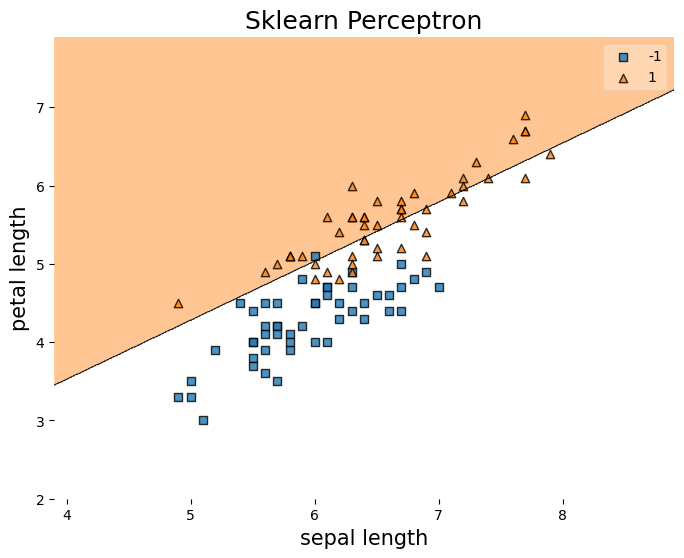

In [5]:
# Plot decision boundary where versicolor=-1, virginica=+1
plt.figure(figsize = (8, 6))
plot_decision_regions(X.to_numpy(), y, clf = clf)
plt.title("Sklearn Perceptron", fontsize = 18)
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15);

(a) *What do you observe?*

We observe that based upon the sepal and petal length measurements alone, the two species <i>versicolor</i> (represented by blue squares) and <i>virginica</i> (represented by orange triangles) are <b>not</b> linearly separable, making convergence by the Perceptron impossible.

---

(b) We created My_Perceptron class for only 2 inputs. Extend this code for 3 inputs. Investigate the iris data set and choose 3 features to classify setosa and versicolor using your code. Notice that you cannot easily plot the decision boundary now since the data is 3-dimensional, but you can still compare the actual and the predicted labels to see how your algorithm is performing. 

In [6]:
# Creating class My_Perceptron for 3 inputs
class MyPerceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.w3 = np.random.rand(1)
        self.b = np.random.rand(1)
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                self.w1 = self.w1 - update*xi[0]
                self.w2 = self.w2 - update*xi[1]
                self.w3 = self.w3 - update*xi[2]
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        self.w = np.array([self.w1, self.w2, self.w3])
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

(b) Investigate the iris data set and choose 3 features to classify setosa and versicolor using your code. Notice that you cannot easily plot the decision boundary now since the data is 3-dimensional, but you can still compare the actual and the predicted labels to see how your algorithm is performing. 

In [7]:
# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("iris_dataset.csv")

# We need only versicolor & setosa, which are the last 100 rows
df = df.iloc[:100]

# We also only need sepal length & width, and petal length
X = df[["sepal_length", "sepal_width", "petal_length"]].to_numpy()

# Store the labels in y
y = df['species']

# Convert labels to plottable points where setosa=-1, virginica=+1
y = np.where(y == 'setosa', -1, 1)

# Instantiate one instance of My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method 
my_clf.fit(X, y)

# Predict labels on X
y_pred = my_clf.predict(X).reshape(100)

# Compare actual and predicted labels of 3-dimensional inputs
print('\n',(y == y_pred).sum(), ' labels were correctly predicted and',\
      (y != y_pred).sum(), 'were incorrectly predicted.\n')

# Describe the linear equation of the regressor line
b1 = round(my_clf.w[0][0],2)    # first weight
b2 = round(my_clf.w[1][0],2)    # second weight
b3 = round(my_clf.w[2][0],2)    # third weight
b0 = round(my_clf.b[0],2)       # bias
print(f'The regressor line can be described by:  y = {b1} x1 + {b2} x2 + {b3} x3 + {b0} \n')


 100  labels were correctly predicted and 0 were incorrectly predicted.

The regressor line can be described by:  y = -1.23 x1 + -3.83 x2 + 5.91 x3 + -0.54 



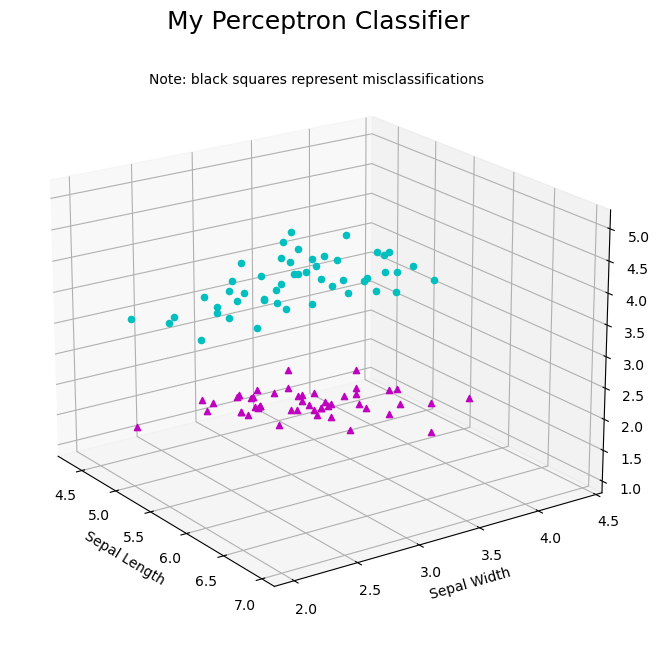

In [8]:
# Plot the data points using all 3 variable inputs
plt.figure(figsize = (8, 8))
ax = plt.axes(projection ='3d')
for i in range(len(X)):
    xs = X[i,0]
    ys = X[i,1]
    zs = X[i,2]
    ax.scatter(xs, ys, zs, 
               c='c' if y[i] > 0 and y_pred[i] > 0 else 'm' if y[i] < 0 and y_pred[i] < 0 else 'b', 
               marker='o' if y[i] > 0 and y_pred[i] > 0 else '^' if y[i] < 0 and y_pred[i] < 0 else 's')

# Set axes limits and labels
ax.set_xlim(np.amin(X[:,0])-.1, np.amax([X[:,0]])+.1)
ax.set_ylim(np.amin(X[:,1])-.1, np.amax([X[:,1]])+.1)
ax.set_zlim(np.amin(X[:,2])-.1, np.amax([X[:,2]])+.1)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

# Customize the view angle so it's easier to see the scatter points
ax.view_init(elev=20., azim=-35)
plt.title("My Perceptron Classifier", fontsize = 18)
ax.text2D(0.225, 0.925, "Note: black squares represent misclassifications", transform=ax.transAxes)
plt.show()

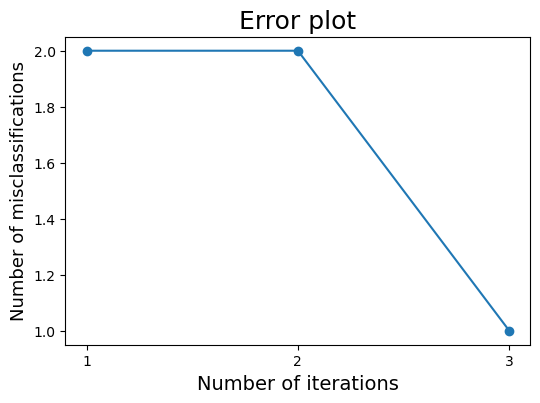

In [9]:
# We plot the errors for each iteration
# We also see the number of iterations needed for the algorithm to find the classifier
plt.figure(figsize = (6, 4))
plt.plot(range(1, len(my_clf.errors)+1), my_clf.errors, marker = "o")
plt.title("Error plot", fontsize = 18)
plt.xlabel("Number of iterations", fontsize = 14)
plt.ylabel("Number of misclassifications", fontsize = 13)
plt.xticks(range(1, len(my_clf.errors)+1))
plt.show()

We observe that convergence is achieved after 2 iterations of the MyPerceptron classifier.

---

(c) Try to generalize My_Perceptron code so it could be used for any number of inputs. 
*(Hint: Recall, that for a list ```w``` we can use ```w[-1]``` and ```w[:-1]``` to access the last value in the list and all the values expect the very last value. Also, use ``` np.dot```, NumPy dot product, to compute the pre-activation value of $z$.)*

In [10]:
# Creating class My_Perceptron for any number of inputs
import random
class MyPerceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        n = X.shape[1]
        self.w = np.zeros(n+1)
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                for i in range(n):
                    self.w[i] = self.w[i] - update*xi[i]
                self.w[-1] = self.w[-1] - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        return np.dot(x, self.w[:-1]) + self.w[-1]
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

We'll test this code by running all 4 features of our dataset through our new classifier.

In [11]:
# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("iris_dataset.csv")

# We need only setosa & versicolor, which are the last 100 rows
df = df.iloc[:100]

# We also only need sepal length & width, and petal length
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()

# Store the labels in y
y = df['species']

# Convert labels to plottable points where setosa=-1, virginica=+1
y = np.where(y == 'setosa', -1, 1)

# Instantiate one instance of My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method 
my_clf.fit(X, y)

# Predict labels on X
y_pred = my_clf.predict(X).reshape(100)

# Compare actual and predicted labels of 4-dimensional inputs
print('\n',(y == y_pred).sum(), ' labels were correctly predicted and',\
      (y != y_pred).sum(), 'were incorrectly predicted.\n')


 100  labels were correctly predicted and 0 were incorrectly predicted.



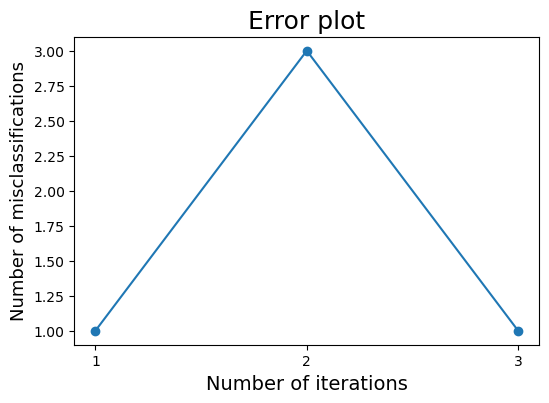

In [12]:
# We plot the errors for each iteration
# We also see the number of iterations needed for the algorithm to find the classifier
plt.figure(figsize = (6, 4))
plt.plot(range(1, len(my_clf.errors)+1), my_clf.errors, marker = "o")
plt.title("Error plot", fontsize = 18)
plt.xlabel("Number of iterations", fontsize = 14)
plt.ylabel("Number of misclassifications", fontsize = 13)
plt.xticks(range(1, len(my_clf.errors)+1))
plt.show()

We observe that convergence is achieved after 2 iterations of the MyPerceptron classifier.